In [1]:
import os
from dotenv import load_dotenv
from moralis import evm_api
import numpy as np
import pandas as pd
from pandas import json_normalize
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
api_key = os.getenv('API_KEY')

cursor = ''
df = pd.DataFrame()

for x in range(2):

    result = evm_api.nft.get_nft_contract_transfers(
        api_key=api_key,
        params={
            "address": "0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB", 
            "chain": "eth",
            "cursor": cursor
        }
    )

    cursor = result["cursor"]
    df2 = json_normalize(result['result'])

    if df.empty:
      df = df2
    else:
      df = pd.concat([df, df2])
    
    time.sleep(1.1)

df

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator
0,16127395,2022-12-06T17:58:23.000Z,0x083b163ae027d326aa4b777b356c9f96ad2984892191...,0xb6be11d0b39d3094cdf8f16d2ba9b5c898940f0a6e4a...,21,38,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8054,0xd320d797ce3f09f13600125dae6203c62c0d056e,0x955619054b88303da4f73582bc4182112be7693d,1,1,None
1,16127374,2022-12-06T17:54:11.000Z,0xcc943efdeb3675aebe708f2f39546baf1edc7589b1a9...,0x94e22e774055b55e9ec1cfd0c39b92077c545ec45d3c...,132,208,73610000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7361,0x6301add4fb128de9778b8651a2a9278b86761423,0x5e14f28f217ca7e20a4108e08c91686fbdd912d5,1,1,None
2,16127062,2022-12-06T16:51:35.000Z,0x8d953f98249f1003aff8eeae92ad13c4fcb00f593058...,0x15fc1a99429408df17000efd450d20fc85881ae5abdf...,95,186,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,8054,0x4fee2d2e9ca2899f392ca656eccc3800e2c36bed,0xd320d797ce3f09f13600125dae6203c62c0d056e,1,1,None
3,16126878,2022-12-06T16:14:23.000Z,0x0401a24c5debc074dc63479e5a8d5425212a78e7f56e...,0x65a99d50e99bf29741315ee107792921a7be813b773e...,116,294,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,6326,0x0ecf80f645bcf1253ad165930bd36be502f9f608,0xad5d0f44255d67ab9941b5380bcaa2ee54b42d02,1,1,None
4,16126220,2022-12-06T14:02:11.000Z,0xd098307dfd8d0efd42e405d04657144851f720955c29...,0x890bac4ee42f4e82655ba17f06d9a4be880234d10bba...,207,277,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,4930,0xbd7c2283a6f2ec7b22937520aafd50c003039c0f,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16034235,2022-11-23T17:37:59.000Z,0x0dd8ae35ccd9bb435b85e09c0059e3d9f4231bbd0eea...,0xa9a2b27135c8da0a4a049d03b9f3bedd068917118032...,261,381,64000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7647,0x4bbb41f61fffc1bbe65a2aa192c65281e16ea758,0x2891a448d93c6bcf50a80931062d9028f8c6e913,1,1,None
96,16034110,2022-11-23T17:12:23.000Z,0x880e41e4067834aebb38335c40b1fdcfc2941249bca0...,0x1853930883b25b541371ef82f3da38483b8c646330d9...,22,98,62950000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1306,0xbbaec56b725a0b9501a655d7d1b48555af637b70,0x5e3cab8074c647c8f51cb3491fe64c00b2fd8355,1,1,None
97,16034099,2022-11-23T17:10:11.000Z,0x6ad779f8f206b4d9c70f612fd25c8ac799fcead1d92c...,0xb0627c498fe88e2f03874db9d13c6a37785bef527ae7...,227,276,79950000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,258,0x0232d1083e970f0c78f56202b9a666b526fa379f,0x5e14f28f217ca7e20a4108e08c91686fbdd912d5,1,1,None
98,16034075,2022-11-23T17:05:23.000Z,0x2b06f31c4af3bb572755b89331a12a57a2869190bb50...,0x80cb0367d4607138fe854579bcbff684b7c684541838...,88,179,0,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1580,0x9fc4001133d3825b7ce4b05bcfbe227fb3cd5fdf,0xf531fefb2e2898c50d6850ed96f3a80c8bc3d853,1,1,None


In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

df = df[df['value'] != '0']

df['Date'] = df.apply(lambda row: datetime.datetime.strptime(row.block_timestamp[0:10],'%Y-%m-%d').strftime('%b %d'), axis=1)

df

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,verified,operator,Date
1,16127374,2022-12-06T17:54:11.000Z,0xcc943efdeb3675aebe708f2f39546baf1edc7589b1a9...,0x94e22e774055b55e9ec1cfd0c39b92077c545ec45d3c...,132,208,73610000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7361,0x6301add4fb128de9778b8651a2a9278b86761423,0x5e14f28f217ca7e20a4108e08c91686fbdd912d5,1,1,None,Dec 06
10,16123494,2022-12-06T04:54:35.000Z,0xfb78f1216d23f82d1ba0d3807529261cfd91aa6e2401...,0x0ea0276974d405cd7eb68e8ed299e07d26fd902b6fa0...,34,48,65500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,3968,0xb271a29511cb2075911bd48286ecf79d59582531,0x60e23da7a0b229902da892ddd6a839382eab04ca,1,1,None,Dec 06
14,16122878,2022-12-06T02:51:11.000Z,0x5b41160cf6de1d9bf3863f8ef137cfede8f4b6130402...,0xb0dea23cd6a113ee876a480309a4c58e7b961b452c6d...,98,769,67500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1621,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,0xfe2108fe61e9b8ba76ad56968f29c16efd926846,1,1,None,Dec 06
15,16122845,2022-12-06T02:44:35.000Z,0x9ba488ca99ce8fd49c480517428c6098a99983f7ff48...,0x32fd733ec2f21efa3b6e1fd1a30f0e69a167f57870f4...,1,3,68500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,9532,0x7c901d78ba68b5be8368c2305f3b270bf93c4ced,0x0ab9d1424ac85e0ae4b51d6faf0cf5d38ca01ef5,1,1,None,Dec 06
17,16122297,2022-12-06T00:54:35.000Z,0xe66dc0d04ff7bb4348acbde5f420f202ca494b1dc59c...,0x8c68309f83018fb3890fa08dbcdc9a11378aba66a28c...,83,219,74900000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,6879,0xb05cb2b980314b5d13dba4488921ff5bdf3ab690,0xbadb844dfb0ec559aaf3645b52ec3db0e0a3e124,1,1,None,Dec 06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,16038342,2022-11-24T07:27:11.000Z,0xfd70bc40426e0be128929313bdd63aee9411674690df...,0x1639cd5bebd446b066bc0680c9c9316849195755af2e...,7,61,94990000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,6226,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0x7caaaa59ee2126984008ffadd7abdde0ca0d5a0c,1,1,None,Nov 24
95,16034235,2022-11-23T17:37:59.000Z,0x0dd8ae35ccd9bb435b85e09c0059e3d9f4231bbd0eea...,0xa9a2b27135c8da0a4a049d03b9f3bedd068917118032...,261,381,64000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,7647,0x4bbb41f61fffc1bbe65a2aa192c65281e16ea758,0x2891a448d93c6bcf50a80931062d9028f8c6e913,1,1,None,Nov 23
96,16034110,2022-11-23T17:12:23.000Z,0x880e41e4067834aebb38335c40b1fdcfc2941249bca0...,0x1853930883b25b541371ef82f3da38483b8c646330d9...,22,98,62950000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,1306,0xbbaec56b725a0b9501a655d7d1b48555af637b70,0x5e3cab8074c647c8f51cb3491fe64c00b2fd8355,1,1,None,Nov 23
97,16034099,2022-11-23T17:10:11.000Z,0x6ad779f8f206b4d9c70f612fd25c8ac799fcead1d92c...,0xb0627c498fe88e2f03874db9d13c6a37785bef527ae7...,227,276,79950000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,258,0x0232d1083e970f0c78f56202b9a666b526fa379f,0x5e14f28f217ca7e20a4108e08c91686fbdd912d5,1,1,None,Nov 23


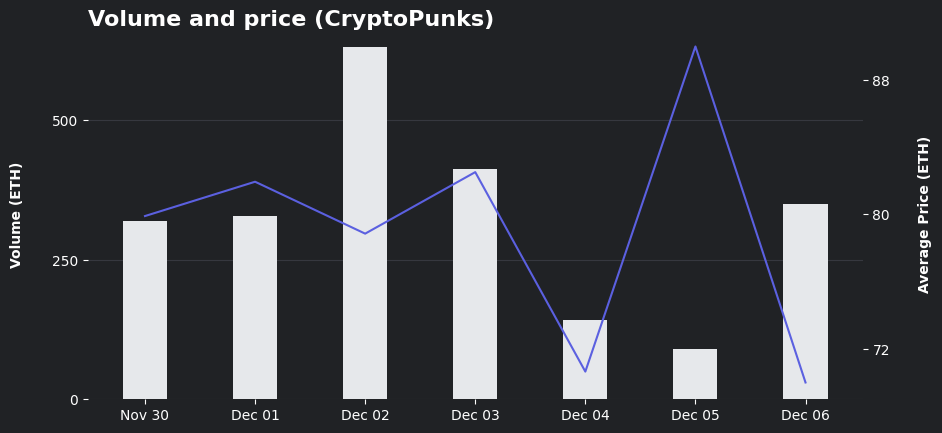

In [4]:
dates = df.Date.unique()[0:7] # select the 7 most recent days

dates = dates[::-1]

volumes = []
avgs = []

for date in dates:
    tempDf = df[df.Date == date]
    values = [int(num)/1000000000000000000 for num in tempDf['value']]
    volumes.append(np.sum(values))
    avgs.append(np.mean(values))

plt.style.use('dark_background')

fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_facecolor('#202225')

ax.set_facecolor("#202225")
ax.grid(visible=True, axis="y", zorder=0, color="#36383F")
ax.bar(x=dates, height=volumes, width=0.4, zorder=3, color="#E6E8EB")
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylabel("Volume (ETH)", fontweight='heavy', labelpad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()
ax2.plot(dates, avgs, color='#5B60E0')
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_ylabel("Average Price (ETH)", fontweight='heavy', labelpad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.title('Volume and price (CryptoPunks)', loc='left', fontsize=16, fontweight="heavy", verticalalignment="top")
plt.show()